In [11]:
import numpy as np
import matplotlib.pyplot as plt

def cost_of_generator(nb_gen):
    return init_cost * (cost_coef ** nb_gen)

def update_multiplier(nb_gen):    
    multipliers = 1
    if nb_gen >= 25:
        multipliers *=2
    if nb_gen >= 50:
        multipliers *=2
    if nb_gen >= 100:
        multipliers *=2
    if nb_gen >= 200:
        multipliers *=2
    if nb_gen >= 400:
        multipliers *=2
    return multipliers

#generateur 1
nb_gen = 1  
init_cost = 3.738
cost_coef = 1.07
init_productivity = 1.67

# Initialisation des variables
capital = 10  
time_step = 1 
multipliers = 1  
time = 0  #
max_time = 200 #seconde

#pour tracer la courbe 
generators = [nb_gen]
capitals = [capital]

times = [0]  
productions = [init_productivity * nb_gen * multipliers]  
costs =[init_cost * cost_coef ** nb_gen]

# Simulation du jeu
while time < max_time: 
    # Calcul de la production à chaque instant
    total_production = init_productivity * nb_gen * multipliers  
    
    # Accumuler la production au capital
    capital += total_production * time_step
    
    # Acheter un générateur si le capital est suffisant
    while capital >= cost_of_generator(nb_gen + 1):
        nb_gen += 1  # Acheter un générateur
        capital -= cost_of_generator(nb_gen)  
        
        # Mettre à jour le multiplicateur en fonction du nombre de générateurs
        multipliers = update_multiplier(nb_gen)

    # Enregistrer les valeurs pour afficher les courbes
    time += time_step
    times.append(time/60)
    productions.append(total_production)
    generators.append(nb_gen)
    capitals.append(capital)
    costs.append(cost_of_generator(nb_gen))




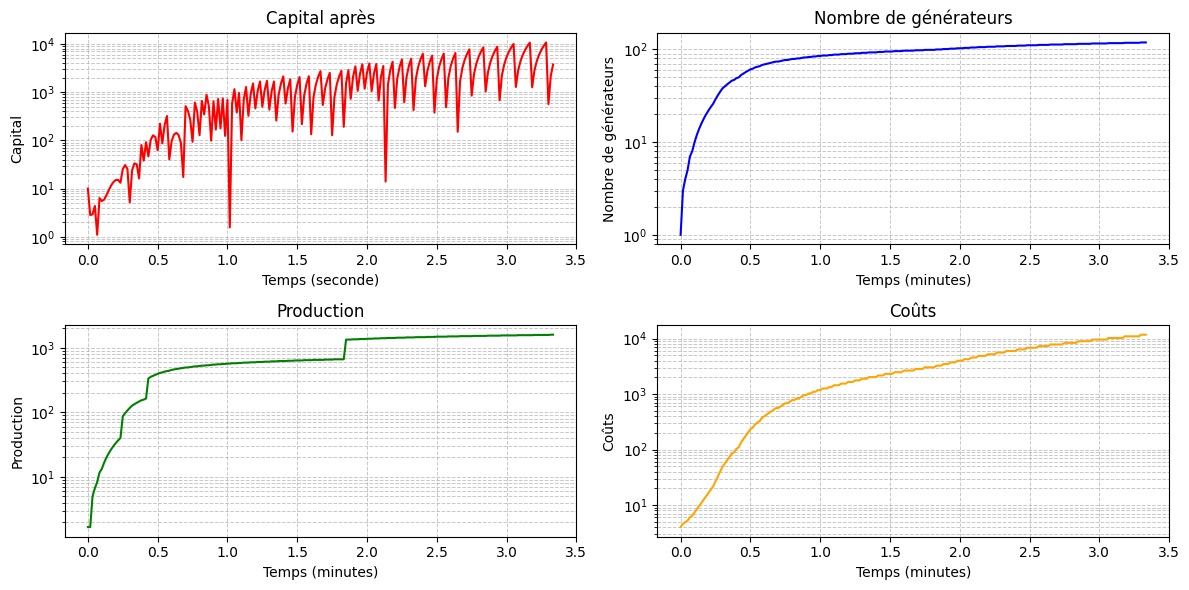

In [12]:
plt.figure(figsize=(12, 6))

# Sous-graphique 1 : Capital après
plt.subplot(2, 2, 1)  # 2x2 grille, premier graphique
plt.plot(times, capitals, label="Capital après", color="red")
plt.xlabel("Temps (seconde)")
plt.ylabel("Capital")
plt.yscale("log")
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title("Capital après")

# Sous-graphique 2 : Nombre de générateurs
plt.subplot(2, 2, 2)  # 2x2 grille, deuxième graphique
plt.plot(times, generators, label="Nombre de générateurs", color="blue")
plt.xlabel("Temps (minutes)")
plt.ylabel("Nombre de générateurs")
plt.yscale("log")
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title("Nombre de générateurs")

# Sous-graphique 3 : Production
plt.subplot(2, 2, 3)  # 2x2 grille, troisième graphique
plt.plot(times, productions, label="Production", color="green")
plt.xlabel("Temps (minutes)")
plt.ylabel("Production")
plt.yscale("log")
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title("Production")

# Sous-graphique 4 : Coûts
plt.subplot(2, 2, 4)  # 2x2 grille, quatrième graphique
plt.plot(times, costs, label="Coûts", color="orange")
plt.xlabel("Temps (minutes)")
plt.ylabel("Coûts")
plt.yscale("log")
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title("Coûts")

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage
plt.show()

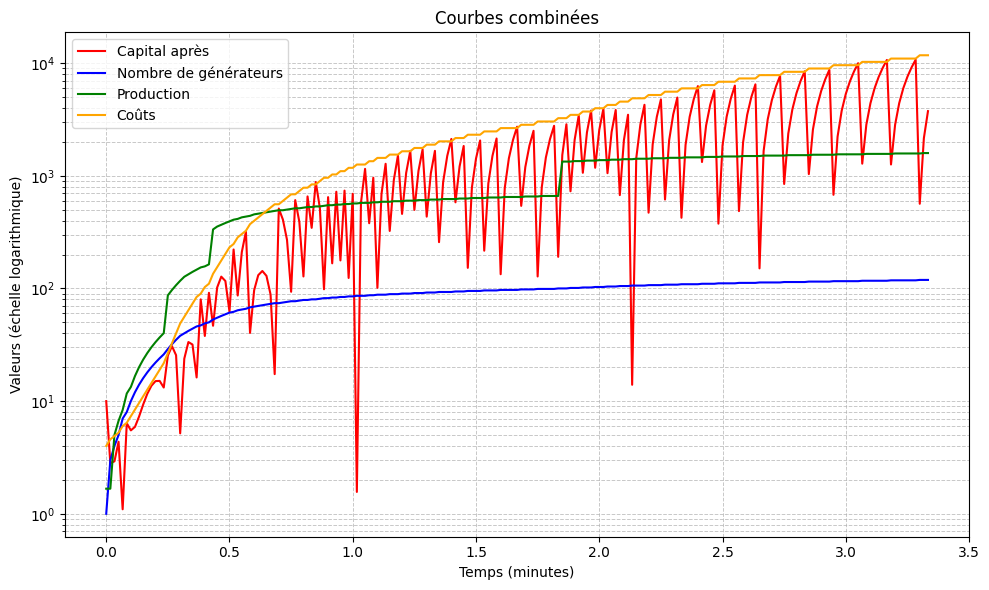

In [13]:
plt.figure(figsize=(10, 6))

# Courbe 1 : Capital après
plt.plot(times, capitals, label="Capital après", color="red")

# Courbe 2 : Nombre de générateurs
plt.plot(times, generators, label="Nombre de générateurs", color="blue")

# Courbe 3 : Production
plt.plot(times, productions, label="Production", color="green")

# Courbe 4 : Coûts
plt.plot(times, costs, label="Coûts", color="orange")

# Mise en forme
plt.xlabel("Temps (minutes)")
plt.ylabel("Valeurs (échelle logarithmique)")
plt.yscale("log") 
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.title("Courbes combinées")
plt.tight_layout()

# Affichage
plt.show()